In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("USA_Housing.csv")
target = 'Price'

In [3]:
###Quick view of dataset
def overview_df(dataFrame):
    print("##########Shape###########")
    print(df.shape)
    print("##########Info###########")
    print(df.info())
    print("##########Head###########")
    print(df.head())
    print("##########Columns#########")
    print(df.columns)
    print("##########Types###########")
    print(df.dtypes)
    print("##########NA###########")
    print(df.isnull().sum())
    print("##########For Numerics########")
    print(df.describe().T)
overview_df(df)

##########Shape###########
(5000, 7)
##########Info###########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None
##########Head###########
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2 

In [4]:
#feature selection
df['Address'].nunique()
df = df.drop('Address', axis = 1)

In [5]:
df['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [6]:
df['Price'] = df['Price'].astype(float)
df['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

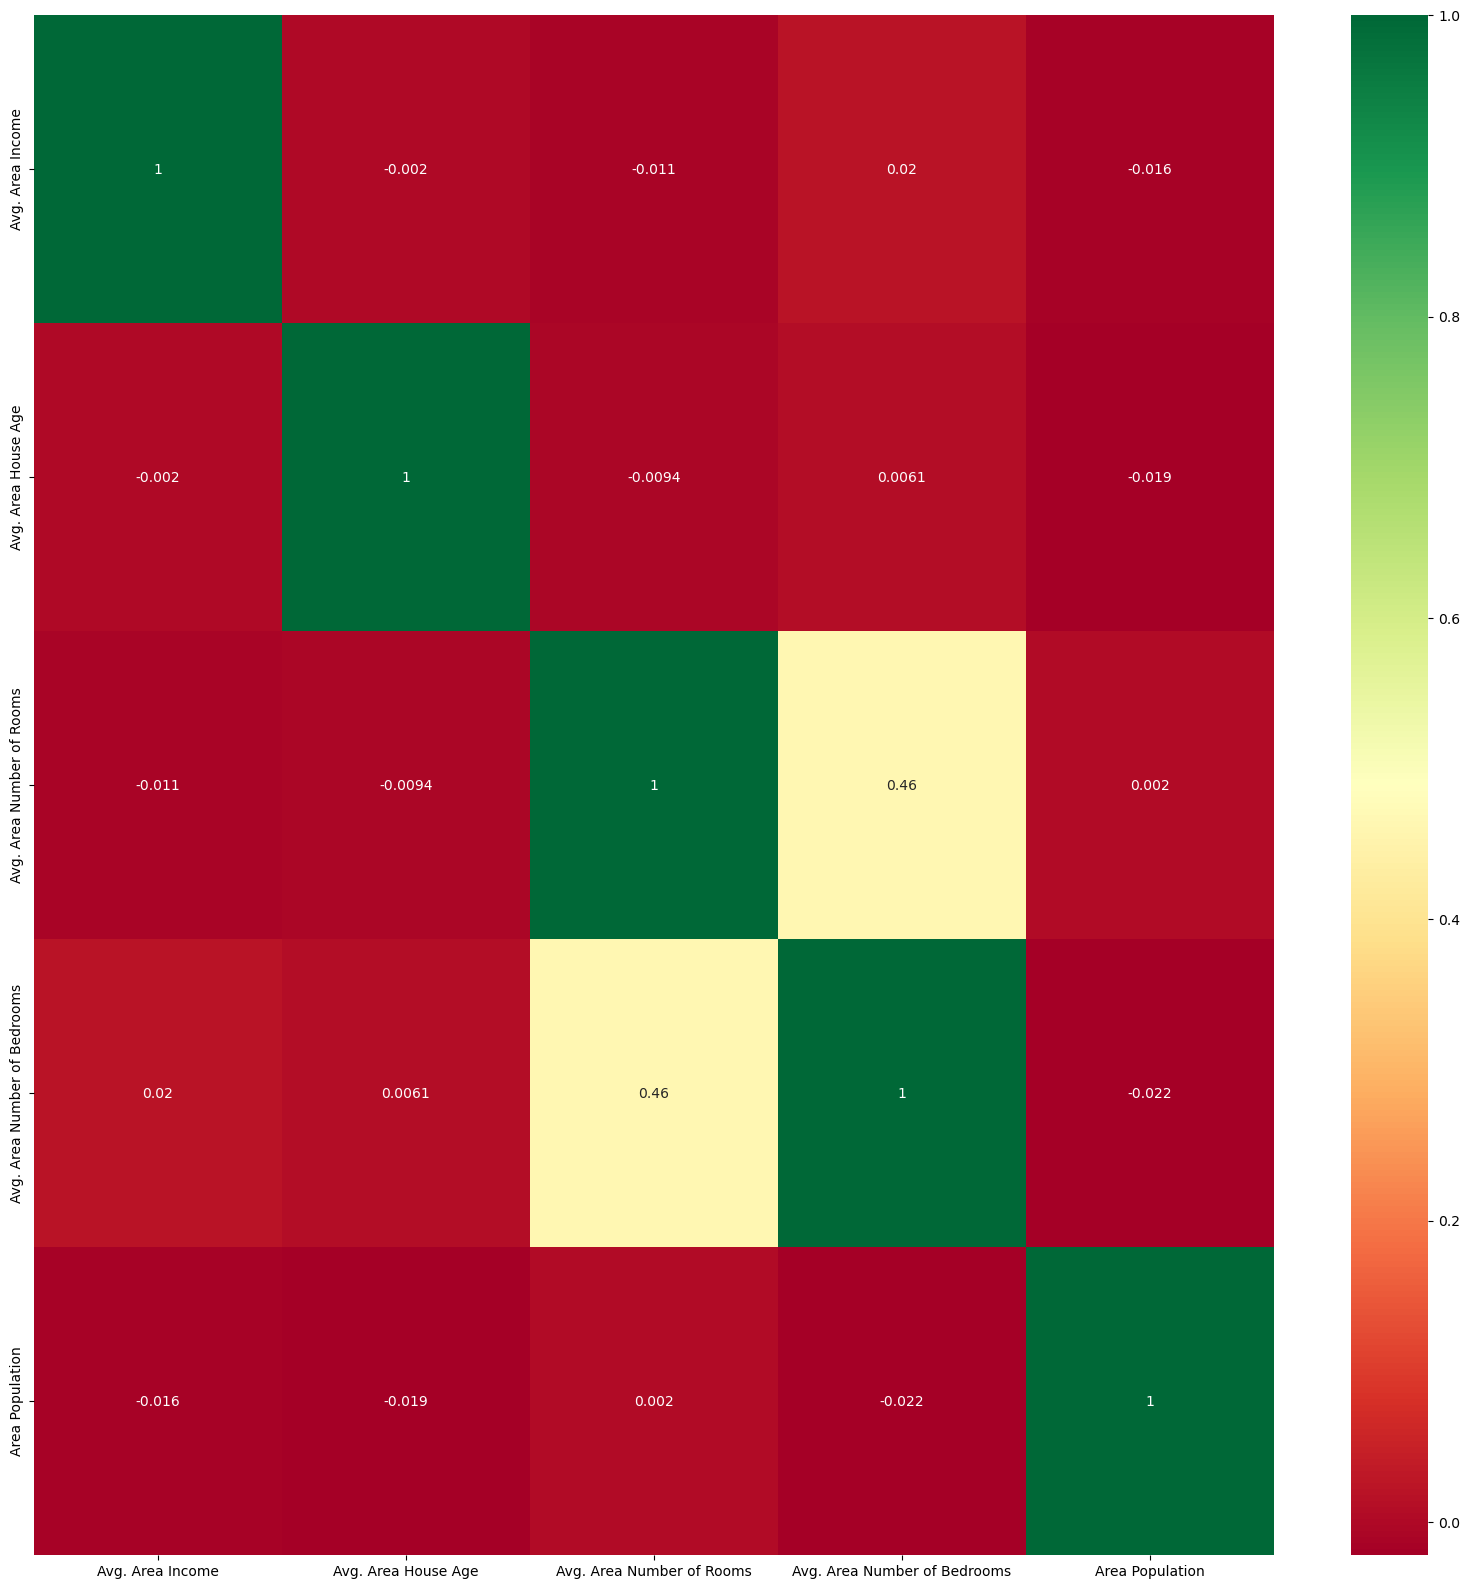

In [7]:
#correlation among columns(target excluded)
df0 = df.drop('Price' , axis = 1)
plt.figure(figsize=(20,20))
sns.heatmap(df0.corr(),annot=True,cmap = "RdYlGn")
plt.show()

<Axes: >

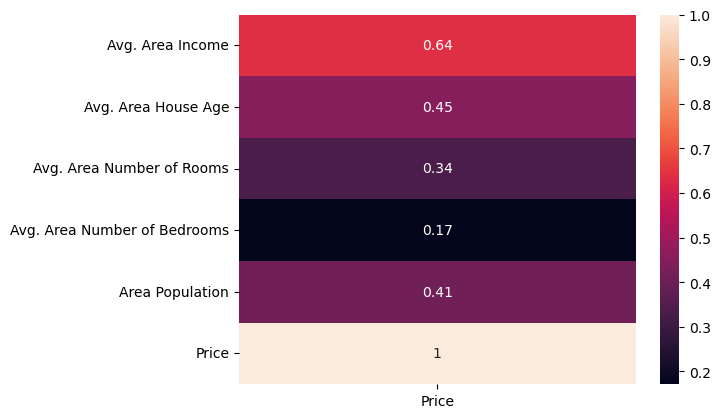

In [8]:
#the relation of columns with the target
sns.heatmap(df.corr().iloc[:,[-1]],annot=True)

<Axes: xlabel='Price', ylabel='Avg. Area Income'>

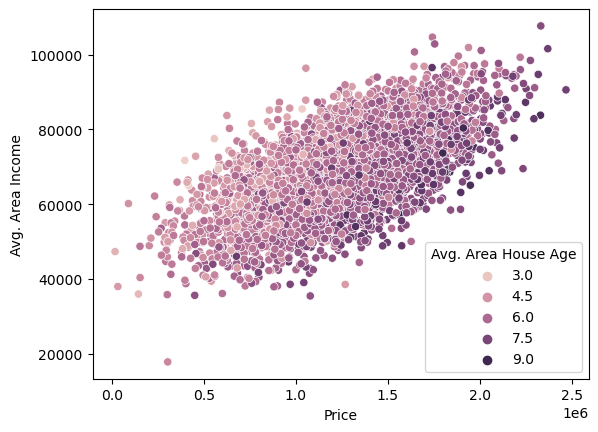

In [9]:
sns.scatterplot(x=df['Price'],y=df['Avg. Area Income'],hue=df['Avg. Area House Age'])
#it is interesting that age and price have positive relation

<Axes: ylabel='Price'>

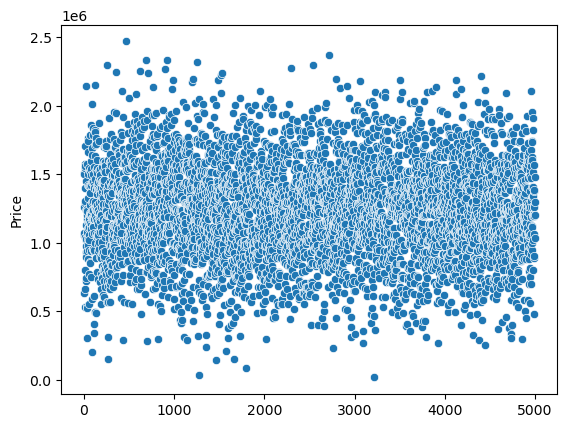

In [10]:
#outliers
sns.scatterplot(data=df['Price'])

C:\Users\user\AppData\Local\Temp\ipykernel_10772\2357544280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['Price']),bins=50);


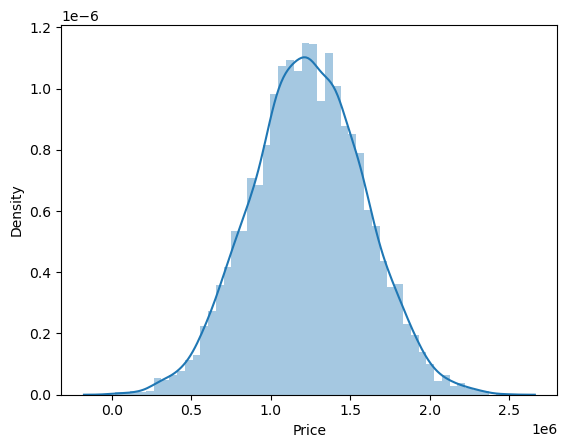

In [11]:
#target distribution
sns.distplot((df['Price']),bins=50);

In [12]:
#Demo model for feature importance
X=df.drop(['Price'],axis=1)
y=df['Price']

In [13]:
model=ExtraTreesRegressor()
model.fit(X,y)

KeyboardInterrupt: 

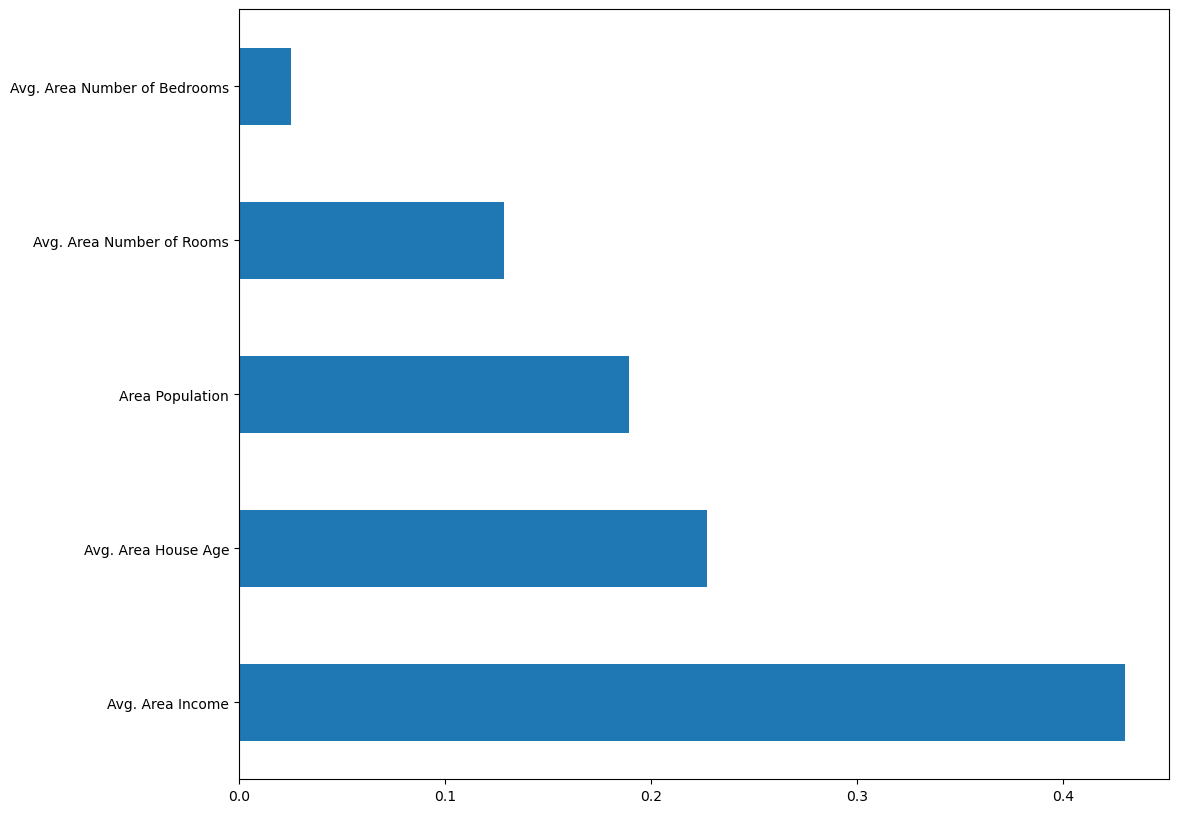

In [ ]:
#Not using in mocdelling, just to check is importance same as corr with price, and answer is yes!
plt.figure(figsize=(12,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()


In [ ]:
cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']

In [ ]:
#Normalization
scaling=MinMaxScaler()
df[cols] =scaling.fit_transform(df[cols])

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,1.059034e+06
1,0.683521,0.488538,0.464501,0.242222,0.575968,1.505891e+06
2,0.483737,0.468609,0.701350,0.695556,0.528582,1.058988e+06
3,0.506630,0.660956,0.312430,0.280000,0.491549,1.260617e+06
4,0.469223,0.348556,0.611851,0.495556,0.376988,6.309435e+05


In [ ]:
#Modelling
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Output 1
print(lr.intercept_)

-1417838.7361434603


In [ ]:
#Output 2
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Avg. Area Income,1.940835e+06
Avg. Area House Age,1.138172e+06
Avg. Area Number of Rooms,9.063826e+05
Avg. Area Number of Bedrooms,7.705110e+03
Area Population,1.054956e+06


C:\Users\user\AppData\Local\Temp\ipykernel_5788\2108297416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-lr.predict(X_test)),bins=50);


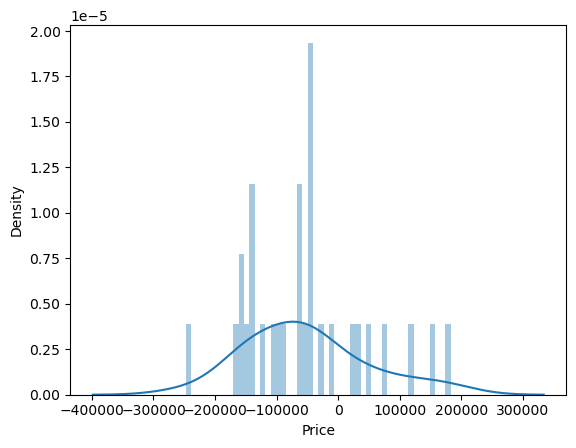

In [ ]:
#Evalution
sns.distplot((y_test-lr.predict(X_test)),bins=50);

In [ ]:
preds = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
#Most important ones
print('R^2:', metrics.r2_score(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
#NOTE: 92,1% of the changability of dependent output can be explained

MAE: 95378.25873870404
MSE: 12356214466.658203
R^2: 0.9210615653521708
RMSE: 111158.51054533882


In [ ]:
#R^2 is always increasing as we add predictors,
#but adjusted R^2 is a metric that adjusted for predictor numbers in a model 
#adjusted R-squared
adR = 1 - (1-lr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adR)

0.917940490952647
